#Аудиториска вежба 5: Introduction to Machine Learning

### <font color='green'>Machine Learning Steps<font>

1. Data preparation


> Read the dataset


> If there is no train and test data, split the data with 80:20 ratio (or another ratio)


> If the inputs and outputs are not merged, find the key, then join the tables into one

2. Obtaining the dataset

Find out how many outputs are in the dataset and decide on the best model:


> Classification (Binary, Multi-label, Multi-class)


> Regression (Linear, Logistic, Polynomial, Bayesian Linear...)



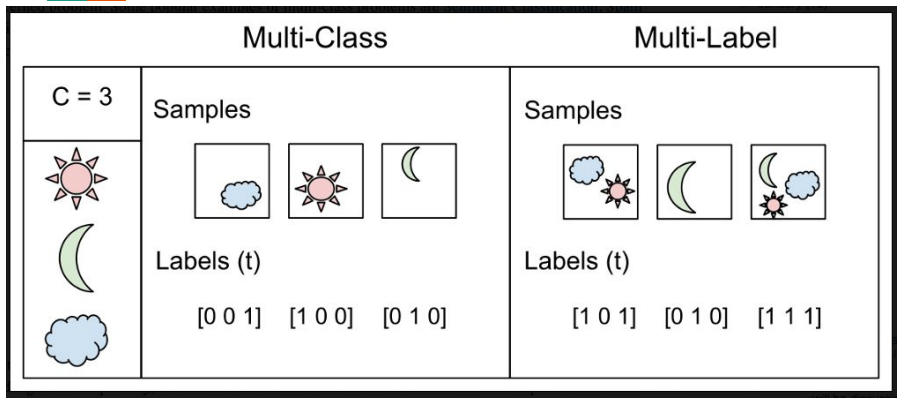

### <font color='pink'>Classification models<font>

**Accuracy**
> Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

> Accuracy = TP+TN/TP+FP+FN+TN

**Precision**
> Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

> Precision = TP/TP+FP

**Recall (Sensitivity)**
> Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

> Recall = TP/TP+FN

**F1 score**
> F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

> F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support**
> Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

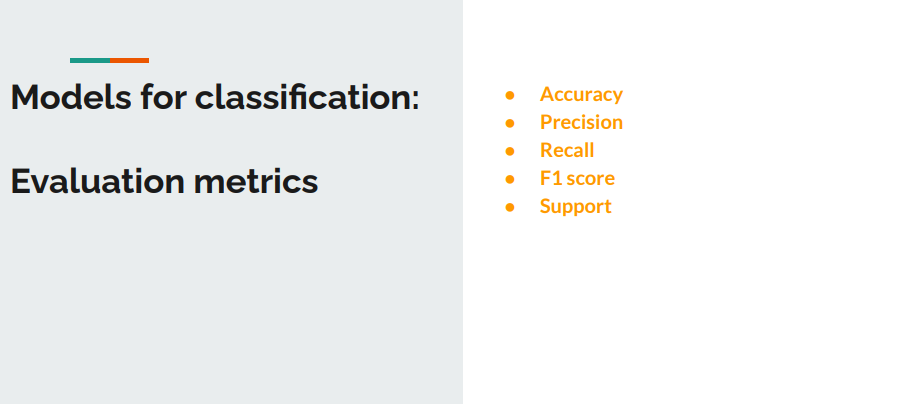

#### <font color='white'>KNN Classification<font>

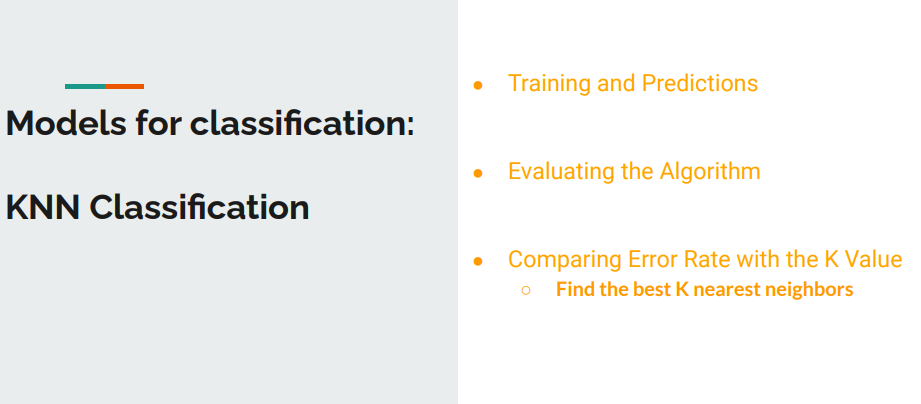

In [1]:
import pandas as pd

In [2]:
!gdown 14WFuJoufMZju0F3BiK4vSh1YbnZI2w4W

Downloading...
From: https://drive.google.com/uc?id=14WFuJoufMZju0F3BiK4vSh1YbnZI2w4W
To: /content/bank_loans.csv
100% 212k/212k [00:00<00:00, 3.47MB/s]


In [3]:
data = pd.read_csv('bank_loans.csv')

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Target column in this case is Personal Loan (0/1), depicting whether the person will be granted a loan or not.

In [5]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

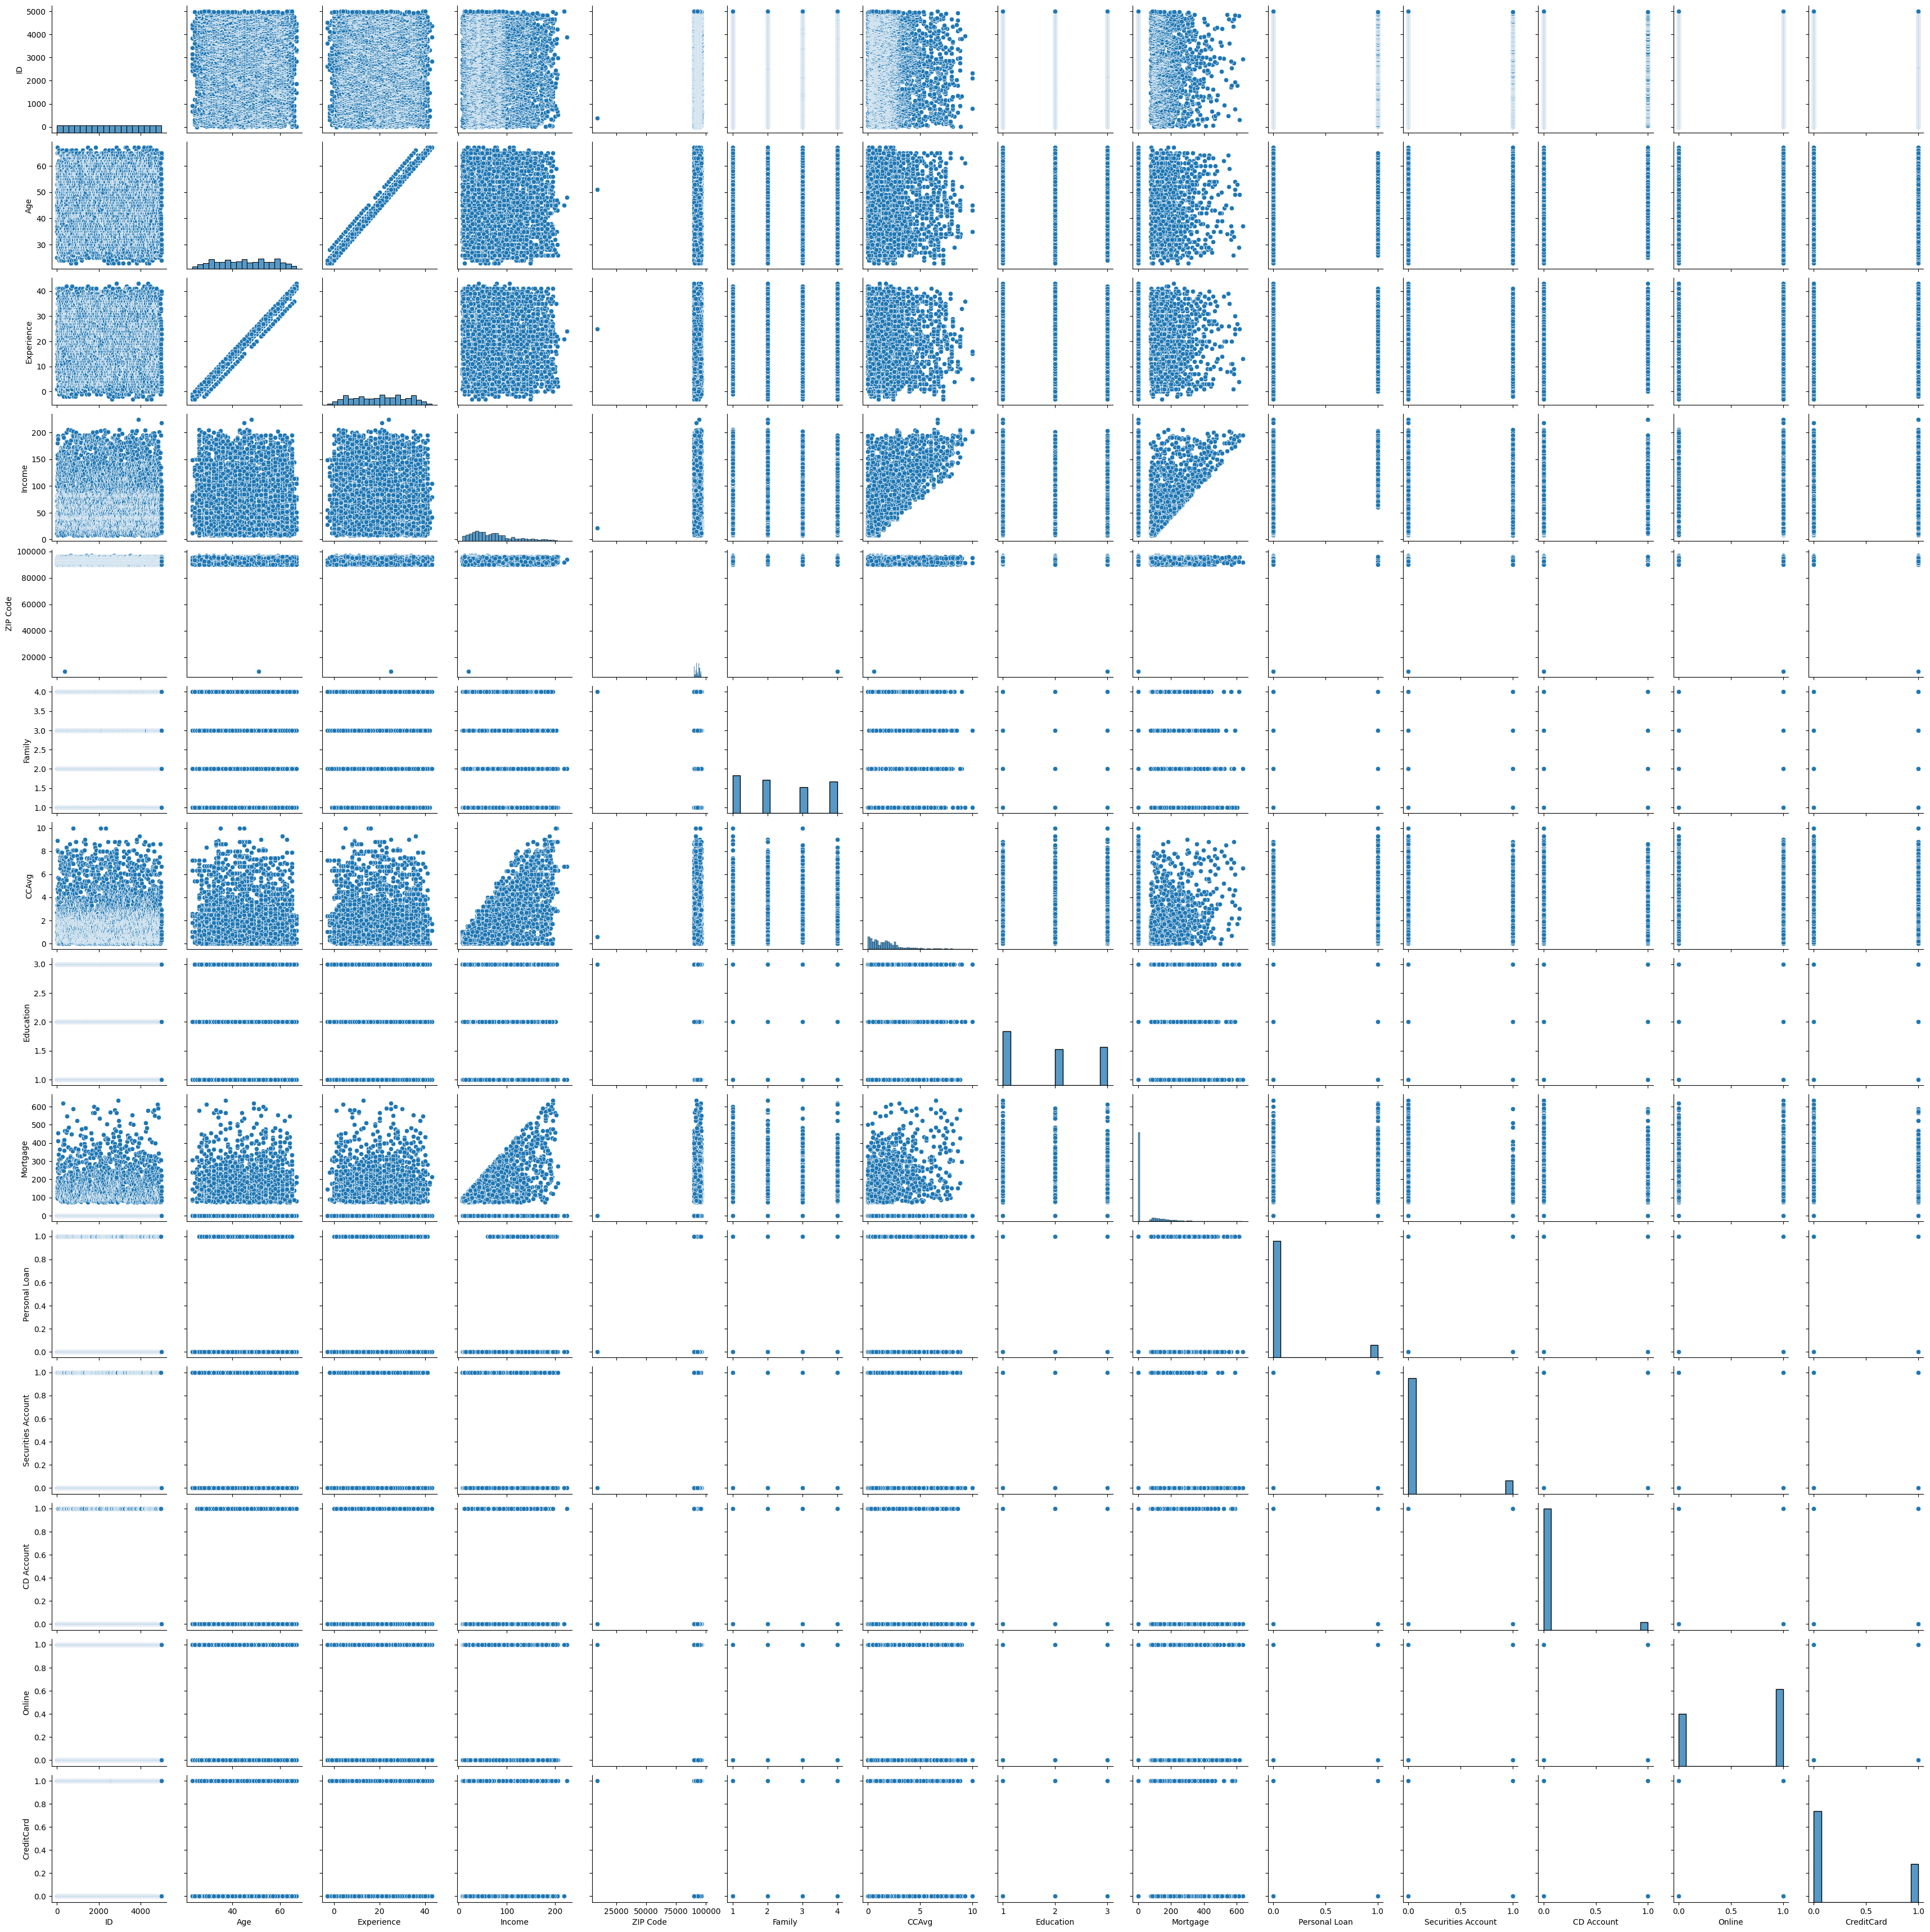

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [7]:
t = data.copy()
t.drop('Personal Loan', axis=1, inplace=True)

In [8]:
#Note: It's important not to use columns like ID!

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(t[t.columns[1:]],  data['Personal Loan'], test_size=0.2)

In [9]:
X_train.shape

(4000, 12)

In [10]:
Y_train.shape

(4000,)

**Scaling the values**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training the model**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [13]:
Y_pred = classifier.predict(X_test)

**Confusion Matrix**

**TP** - You predicted positive and it’s true.

**TN** - You predicted negative and it’s true.

**FP** (Type 1 Error) - You predicted positive and it’s false.

**FN** (Type 2 Error) - You predicted negative and it’s false.

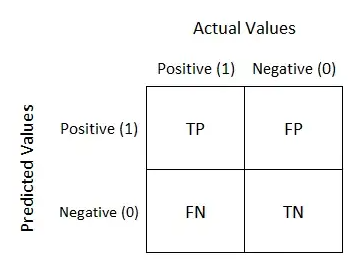

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))

[[900   1]
 [ 43  56]]


In [15]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       901
           1       0.98      0.57      0.72        99

    accuracy                           0.96      1000
   macro avg       0.97      0.78      0.85      1000
weighted avg       0.96      0.96      0.95      1000



In [16]:
print(f1_score(Y_test, Y_pred))

0.7179487179487178


We can see that the F1 score in this case is low, especially when predicting the class 1. We then suspect that this is a result of a bad distribution of the dataset, i.e. that there are many more 0s than 1s.

We check this claim with the following code and conclude that our assumption is correct.

In [17]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

We know that there are 480 ones in the data, so we shrink the data to have an equal number of 1s and 0s - i.e. 480.

In [18]:
even_df = pd.concat([data[data['Personal Loan'] == 0][:480], data[data['Personal Loan'] == 1]], axis=0)

In [19]:
even_df['Personal Loan'].value_counts()

0    480
1    480
Name: Personal Loan, dtype: int64

In [20]:
even_df.shape

(960, 14)

In [21]:
t = even_df.copy()
t.drop('Personal Loan', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(t[t.columns[1:]],  even_df['Personal Loan'], test_size=0.2)

**Scaling the values**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training the model**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [24]:
Y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))

[[94  6]
 [ 8 84]]


In [26]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       100
           1       0.93      0.91      0.92        92

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



We can see that the results are so much better when the data that is fed to the model is more representative.

In [27]:
print(f1_score(Y_test, Y_pred))

0.9230769230769231


#### <font color='white'>Logistic Regression<font>

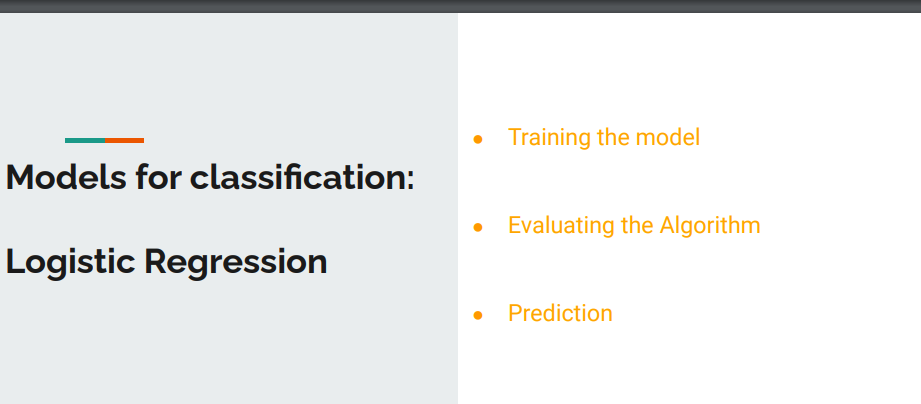

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 15000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=15000)

In [29]:
Y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[93  7]
 [ 9 83]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       100
           1       0.92      0.90      0.91        92

    accuracy                           0.92       192
   macro avg       0.92      0.92      0.92       192
weighted avg       0.92      0.92      0.92       192



In [31]:
print(f1_score(Y_test, Y_pred))

0.9120879120879122


### <font color='orange'>Regression models<font>

#### <font color='white'>Linear Regression<font>

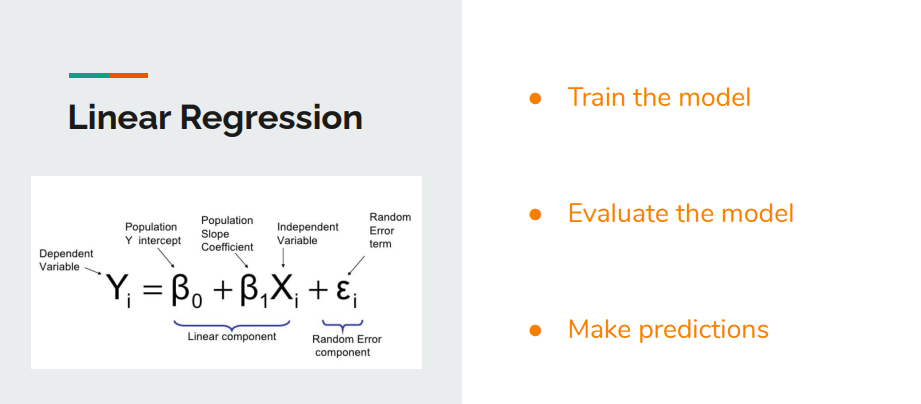

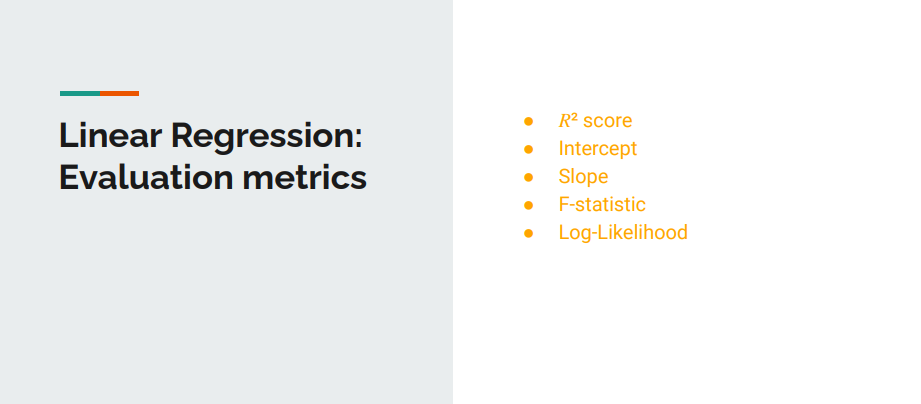

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).



In [32]:
!gdown 1BLhKZsi3mkQ4kyngTeqozgKFQ8P4VSDD

Downloading...
From: https://drive.google.com/uc?id=1BLhKZsi3mkQ4kyngTeqozgKFQ8P4VSDD
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 13.7MB/s]


In [33]:
data = pd.read_csv('advertising.csv')

In [34]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [35]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

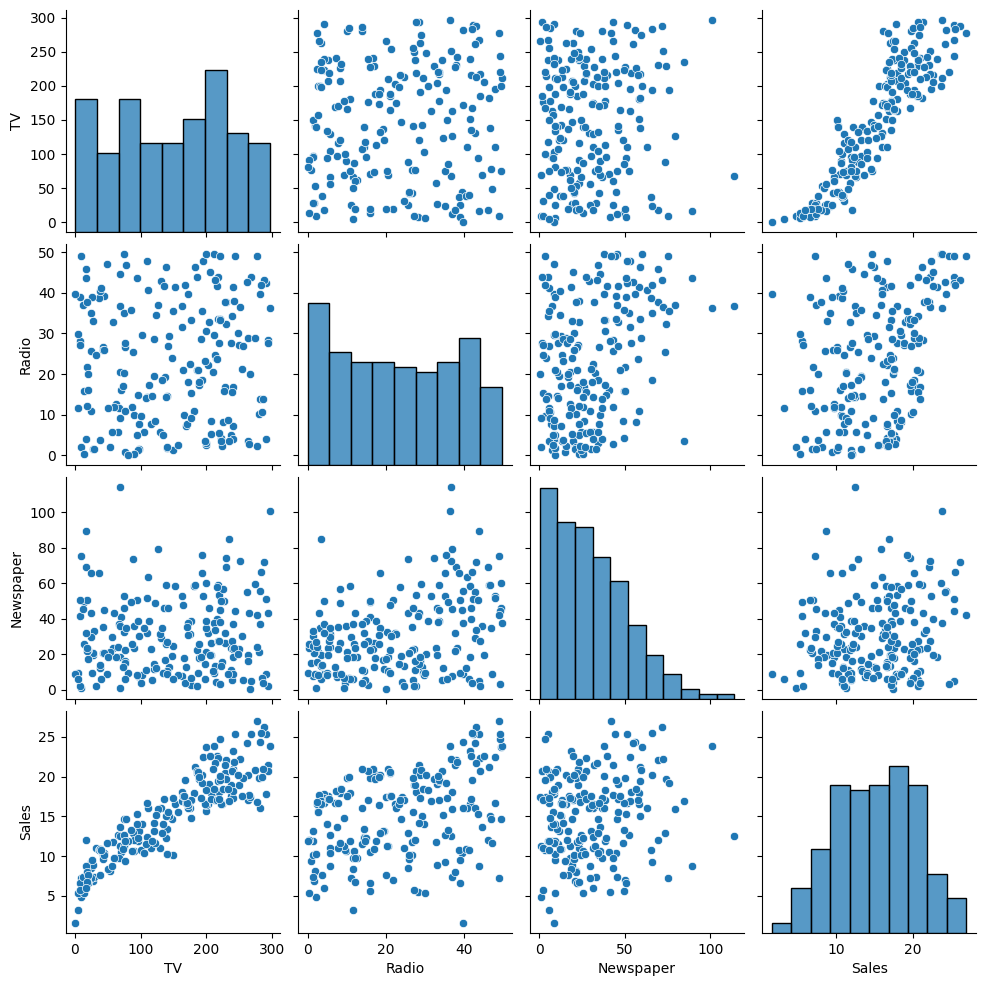

In [36]:
#Note: We use a pairplot to visualize which features are related with each outher.
#Resource: https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [37]:
#Note: The train_test_split model takes three arguments: the train part of the data, the test part of the data, and the size of the test part that we want.
#Note: It's important that the % of the data in the test dataset is chosen randomly and not consecutively.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[:-1]],  data['Sales'], test_size=0.2)

**Scaling the values**

In [38]:
#Note: Standardize features by removing the mean and scaling to unit variance, move the data towards a Normal Distribution.
#Note: In some cases, we may not need to normalize.

from sklearn.preprocessing import StandardScaler

#Note: We fit on the train data, to avoid falling into local values.
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training the model**

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

**Evaluating the model**

In [40]:
#Note: R² is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.
#Note: In other words, it shows how well the data fit the regression model (the goodness of fit).

r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9034141829677513


In [41]:
model.coef_

array([ 4.63250856,  1.59770895, -0.01700628])

In [42]:
#Note: Intercept in a regression model is the expected mean value of Y when all X=0.

print('Intercept:', model.intercept_)

Intercept: 14.933125


Therefore, the function is: 4.71696572 * X + 1.57610256 * Y + (-0.04844321) * Z + 15.308745, where X <=> TV, Y <=> Radio, Z <=> Newspaper

Sales[i] = 4.53263124 * TV[i] + 1.68755478 * Radio[i] + (-0.01107218) * Newspaper[i] + 15.2475

In [43]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([20.83716634, 21.12286552, 18.08701588, 10.61323093, 21.99177856,
        9.49075068,  6.05097684, 11.50681483, 16.59665102, 16.95277576,
       21.38853678, 10.90139682, 24.88504695,  9.19763094, 24.96931076,
       23.4179863 ,  9.05482359, 20.13884453, 15.47019134, 22.57510164,
       13.01898572,  9.86729352,  8.63480132, 16.66540875, 10.0934814 ,
       10.73408043, 10.73313521,  9.36602575, 17.80548754, 23.88456382,
        9.99433711,  9.66500619, 15.6844199 , 10.43025488, 19.83479406,
       20.71988102, 19.2110668 , 16.31239328, 15.83909208,  8.55874043])

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(Y_test, Y_pred_lin)

0.8936108705589088

**Another way to perform a Linear Regression**

In [46]:
#Resource: https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc
#Resource: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

import numpy as np
import statsmodels.api as sm

In [47]:
x = sm.add_constant(X_train)
model = sm.OLS(Y_train, x)

In [48]:
results = model.fit()

F-statistics is a statistic used to test the significance of regression coefficients in linear regression models.

The log-likelihood value of a regression model is a way to measure the goodness of fit for a model. The higher the value of the log-likelihood, the better a model fits a dataset.

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     486.4
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           6.34e-79
Time:                        09:22:18   Log-Likelihood:                -304.32
No. Observations:                 160   AIC:                             616.6
Df Residuals:                     156   BIC:                             628.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9331      0.130    115.060      0.000      14.677      15.189
x1             4.6325      0.130     35.632      0.000       4.376       4.889
x2             1.5977      0.139     11.530      0.000       1.324       1.871
x3            -0.0170      0.139     -0.123      0.903      -0.291       0.257
==============================================================================
Omnibus:                       20.369   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.110
Skew:                          -0.600   Prob(JB):                     5.30e-09
Kurtosis:                       5.068   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
x = sm.add_constant(X_test)

Y_pred_sm = results.predict(x)
print(Y_pred_sm)

[20.83716634 21.12286552 18.08701588 10.61323093 21.99177856  9.49075068
  6.05097684 11.50681483 16.59665102 16.95277576 21.38853678 10.90139682
 24.88504695  9.19763094 24.96931076 23.4179863   9.05482359 20.13884453
 15.47019134 22.57510164 13.01898572  9.86729352  8.63480132 16.66540875
 10.0934814  10.73408043 10.73313521  9.36602575 17.80548754 23.88456382
  9.99433711  9.66500619 15.6844199  10.43025488 19.83479406 20.71988102
 19.2110668  16.31239328 15.83909208  8.55874043]


In [51]:
first = Y_pred_lin.tolist()
first

[20.83716633517851,
 21.122865518479777,
 18.08701587685294,
 10.613230934376823,
 21.991778557857764,
 9.49075068130427,
 6.050976844190114,
 11.506814833375634,
 16.59665102206177,
 16.95277575868213,
 21.388536781306836,
 10.901396819159794,
 24.88504694649275,
 9.19763094463299,
 24.969310758189394,
 23.41798630214018,
 9.054823589208901,
 20.138844525513196,
 15.470191337806217,
 22.575101635590947,
 13.018985720589054,
 9.867293515495625,
 8.634801315477667,
 16.665408748070003,
 10.093481404746285,
 10.734080429500558,
 10.733135206764203,
 9.366025754746232,
 17.805487535019537,
 23.88456382094413,
 9.994337109783928,
 9.665006191007377,
 15.684419899416223,
 10.430254880422208,
 19.83479405992023,
 20.71988101911668,
 19.211066796165248,
 16.312393280346328,
 15.839092084182463,
 8.558740427122867]

In [52]:
second = Y_pred_sm.tolist()
second

[20.837166335178505,
 21.12286551847977,
 18.08701587685295,
 10.613230934376809,
 21.991778557857764,
 9.49075068130426,
 6.050976844190109,
 11.506814833375628,
 16.59665102206177,
 16.952775758682137,
 21.38853678130684,
 10.901396819159785,
 24.885046946492746,
 9.19763094463299,
 24.969310758189387,
 23.417986302140175,
 9.054823589208889,
 20.138844525513193,
 15.470191337806213,
 22.575101635590944,
 13.018985720589043,
 9.867293515495625,
 8.634801315477665,
 16.665408748070007,
 10.093481404746285,
 10.734080429500558,
 10.733135206764196,
 9.366025754746234,
 17.80548753501954,
 23.88456382094413,
 9.99433710978392,
 9.665006191007368,
 15.684419899416227,
 10.430254880422204,
 19.83479405992024,
 20.719881019116674,
 19.211066796165255,
 16.31239328034633,
 15.839092084182461,
 8.558740427122856]

In [53]:
both = zip(first, second)
for i in both:
  print(str(i[0]) + ', ' + str(i[1]) + ', ' + str(round(i[0]) - round(i[1]) < 0.01))

20.83716633517851, 20.837166335178505, True
21.122865518479777, 21.12286551847977, True
18.08701587685294, 18.08701587685295, True
10.613230934376823, 10.613230934376809, True
21.991778557857764, 21.991778557857764, True
9.49075068130427, 9.49075068130426, True
6.050976844190114, 6.050976844190109, True
11.506814833375634, 11.506814833375628, True
16.59665102206177, 16.59665102206177, True
16.95277575868213, 16.952775758682137, True
21.388536781306836, 21.38853678130684, True
10.901396819159794, 10.901396819159785, True
24.88504694649275, 24.885046946492746, True
9.19763094463299, 9.19763094463299, True
24.969310758189394, 24.969310758189387, True
23.41798630214018, 23.417986302140175, True
9.054823589208901, 9.054823589208889, True
20.138844525513196, 20.138844525513193, True
15.470191337806217, 15.470191337806213, True
22.575101635590947, 22.575101635590944, True
13.018985720589054, 13.018985720589043, True
9.867293515495625, 9.867293515495625, True
8.634801315477667, 8.6348013154776

In [54]:
for i in range(0, len(first)):
   print(str(first[i]) + ', ' + str(second[i]) + ', ' + str(round(first[i]) - round(second[i]) < 0.01))

20.83716633517851, 20.837166335178505, True
21.122865518479777, 21.12286551847977, True
18.08701587685294, 18.08701587685295, True
10.613230934376823, 10.613230934376809, True
21.991778557857764, 21.991778557857764, True
9.49075068130427, 9.49075068130426, True
6.050976844190114, 6.050976844190109, True
11.506814833375634, 11.506814833375628, True
16.59665102206177, 16.59665102206177, True
16.95277575868213, 16.952775758682137, True
21.388536781306836, 21.38853678130684, True
10.901396819159794, 10.901396819159785, True
24.88504694649275, 24.885046946492746, True
9.19763094463299, 9.19763094463299, True
24.969310758189394, 24.969310758189387, True
23.41798630214018, 23.417986302140175, True
9.054823589208901, 9.054823589208889, True
20.138844525513196, 20.138844525513193, True
15.470191337806217, 15.470191337806213, True
22.575101635590947, 22.575101635590944, True
13.018985720589054, 13.018985720589043, True
9.867293515495625, 9.867293515495625, True
8.634801315477667, 8.6348013154776

#### <font color='white'>Polynomial Regression<font>

Polynomials provide the best approximation of
the relationship between the dependent and
independent variables.

Therefore, a broad range of functions can be fit under it.

Polynomial Regression still uses "least squares",
but it is an "overdetermined system", meaning
that there are more equations than unknowns.

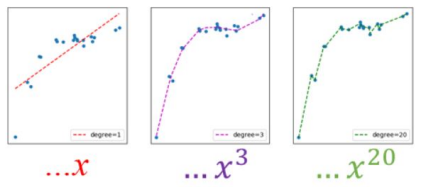

**Overfitting**

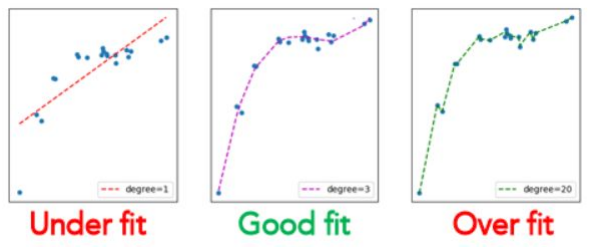

**Regularization**

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.
The loss function is the function that computes the distance between the current output of the model and the expected output.


There are two main types of regularization techniques: Ridge Regularization and Lasso Regularization.



Ridge Regression modifies the over-fitted or under fitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.

Lasso Regularization modifies the over-fitted or under-fitted models by adding the penalty equivalent to the sum of the absolute values of coefficients.



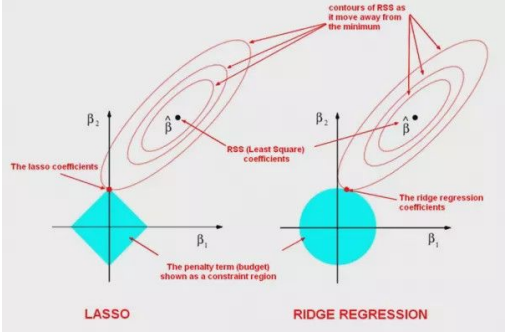

**Cross Validation**

If the dataset is too small to be divided into train and test data we use Cross Validation.

> Leave one out (LOOCV) Cross Validation is an extreme case of K-Fold Cross Validation.

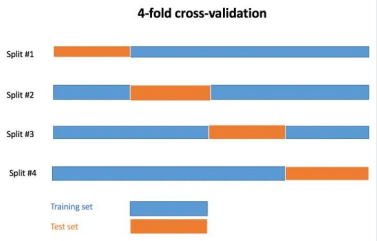

In [55]:
#Resource: https://www.kaggle.com/akram24/position-salaries

!gdown 1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe

Downloading...
From: https://drive.google.com/uc?id=1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe
To: /content/Position_Salaries.csv
100% 246/246 [00:00<00:00, 1.24MB/s]


In [56]:
df = pd.read_csv('Position_Salaries.csv')

In [57]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


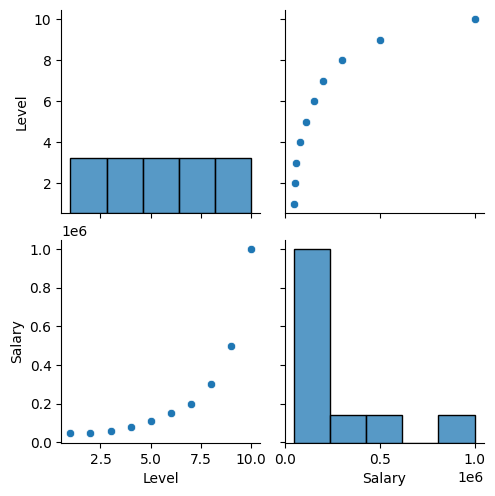

In [58]:
import seaborn as sns

sns.pairplot(df)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2:3].values

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

poly_reg = PolynomialFeatures(5)

In [62]:
X_train

array([[-0.87038828],
       [-0.17407766],
       [ 1.5666989 ],
       [-1.21854359],
       [ 0.87038828],
       [ 1.21854359],
       [ 0.52223297],
       [-1.5666989 ]])

In [63]:
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

X_poly_train

array([[ 1.00000000e+00, -8.70388280e-01,  7.57575758e-01,
        -6.59385060e-01,  5.73921028e-01, -4.99534137e-01],
       [ 1.00000000e+00, -1.74077656e-01,  3.03030303e-02,
        -5.27508048e-03,  9.18273646e-04, -1.59850924e-04],
       [ 1.00000000e+00,  1.56669890e+00,  2.45454545e+00,
         3.84553367e+00,  6.02479339e+00,  9.43903720e+00],
       [ 1.00000000e+00, -1.21854359e+00,  1.48484848e+00,
        -1.80935261e+00,  2.20477502e+00, -2.68661448e+00],
       [ 1.00000000e+00,  8.70388280e-01,  7.57575758e-01,
         6.59385060e-01,  5.73921028e-01,  4.99534137e-01],
       [ 1.00000000e+00,  1.21854359e+00,  1.48484848e+00,
         1.80935261e+00,  2.20477502e+00,  2.68661448e+00],
       [ 1.00000000e+00,  5.22232968e-01,  2.72727273e-01,
         1.42427173e-01,  7.43801653e-02,  3.88437745e-02],
       [ 1.00000000e+00, -1.56669890e+00,  2.45454545e+00,
        -3.84553367e+00,  6.02479339e+00, -9.43903720e+00]])

In [64]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly_train, Y_train)

LinearRegression()

Mean Squared Error (MSE) is the difference between your model's predictions and the ground truth, squared, then averaged out across the whole dataset. It is a simple loss function.

In [65]:
y_pred = lin_reg.predict(X_poly_test)

training_r2 = r2_score(Y_train, lin_reg.predict(X_poly_train))
training_mse = mean_squared_error(Y_train, lin_reg.predict(X_poly_train))

testing_r2 = r2_score(Y_test, y_pred)
testing_mse = mean_squared_error(Y_test, y_pred)

print("r2 score for the training dataset: " + str(training_r2))
print("r2 score for the testing dataset: " + str(testing_r2))

print("  ")
print("MSE for the training dataset: " + str(training_mse))
print("MSE for the testing dataset: " +  str(testing_mse))

r2 score for the training dataset: 0.9998148232105024
r2 score for the testing dataset: 0.9850376948566331
  
MSE for the training dataset: 0.0002177898361869364
MSE for the testing dataset: 0.00022722926524643882


In [66]:
import matplotlib.pyplot as plt
import numpy as np

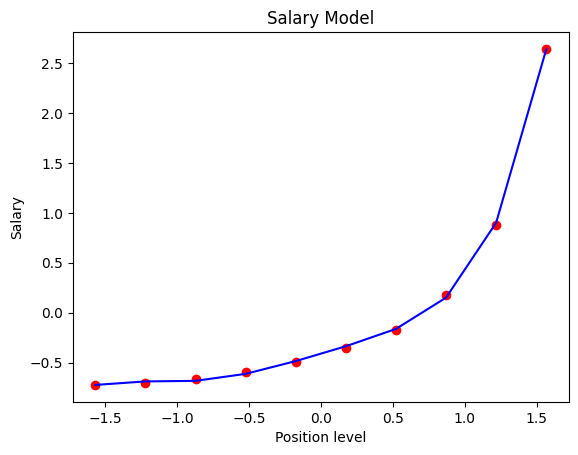

In [67]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')

plt.title('Salary Model')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.show()

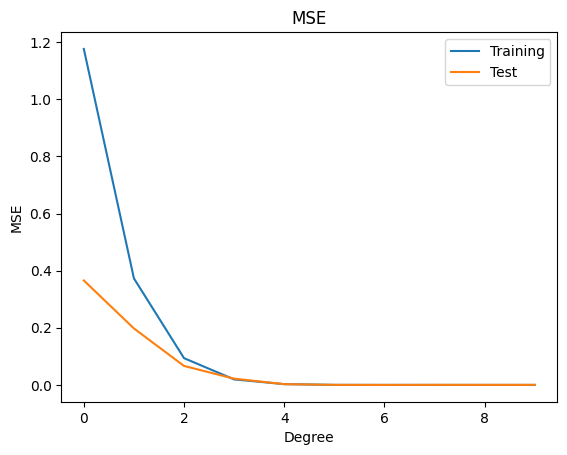

In [68]:
train = []
test = []

for i in range(0, 10):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X_train)

    lin = LinearRegression()
    lin.fit(X_poly, Y_train)

    X_poly_test = poly.fit_transform(X_test)
    y_pred = lin.predict(X_poly_test)

    training_score = mean_squared_error (Y_train, lin.predict(X_poly))
    testing_score = mean_squared_error(Y_test,y_pred)

    train.append(training_score)
    test.append(testing_score)

x = np.arange(10)

plt.plot(x, train, label="Training")
plt.plot(x, test, label="Test")

plt.legend()

plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE")

plt.show()

In [69]:
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.kernel_ridge import KernelRidge

cross_val = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)
model = KernelRidge(alpha=0.003, kernel='poly', degree=5, gamma=1)

scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cross_val)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

model.fit(X_train, Y_train)
y_pred = model.predict(Y_test)
print("r2 score for the testing dataset: " + str(r2_score(Y_test, y_pred)))
print("MSE for the testing dataset: " +  str(mean_squared_error(Y_test, y_pred)))

Mean MAE: 0.184 (0.341)
r2 score for the testing dataset: -0.3978691029291399
MSE for the testing dataset: 0.021229133220164283


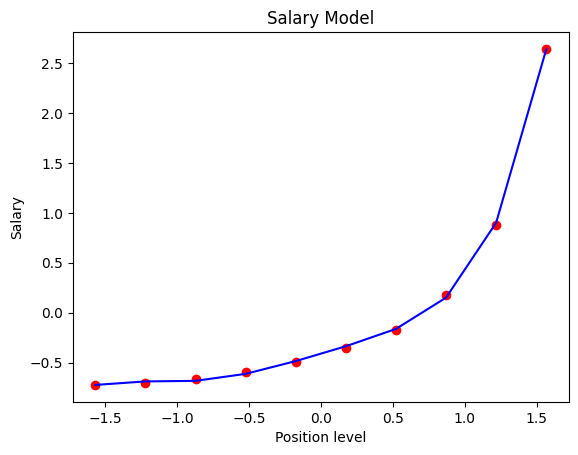

In [70]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')

plt.title('Salary Model')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.show()